<a href="https://colab.research.google.com/github/fatimaAfzaal/Multiple-grade-prediction-Multi-Target-Problem-/blob/main/MultiOutputExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Grade Prediction Project

## STEP 1:
### Problem definition
We have to define the problem and set goal that we we have to do

## STEP 2:
### Data Collection and Exploration
This is the step where we have to collect the data required. As in our project we get the dataset from kaggle(https://www.kaggle.com/datasets/dipam7/student-grade-prediction)

Also in this step we will explore data to get insight and use visualizations as well if needed to understand data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Data Collection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/'+"student.csv")

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,4,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,no,yes,4,5,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,no,5,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,no,yes,4,1,5,0,11,12,10


## Data Exploration

In [ ]:
print('Total number of students: ',len(df))

Total number of students:  395


In [ ]:
print("Parameter are: ",df.columns)

Parameter are:  Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'Ssupport', 'Gsupport', 'feespaid', 'ecactivities', 'internet',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          393 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<ipython-input-94-6688a53f2a0d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


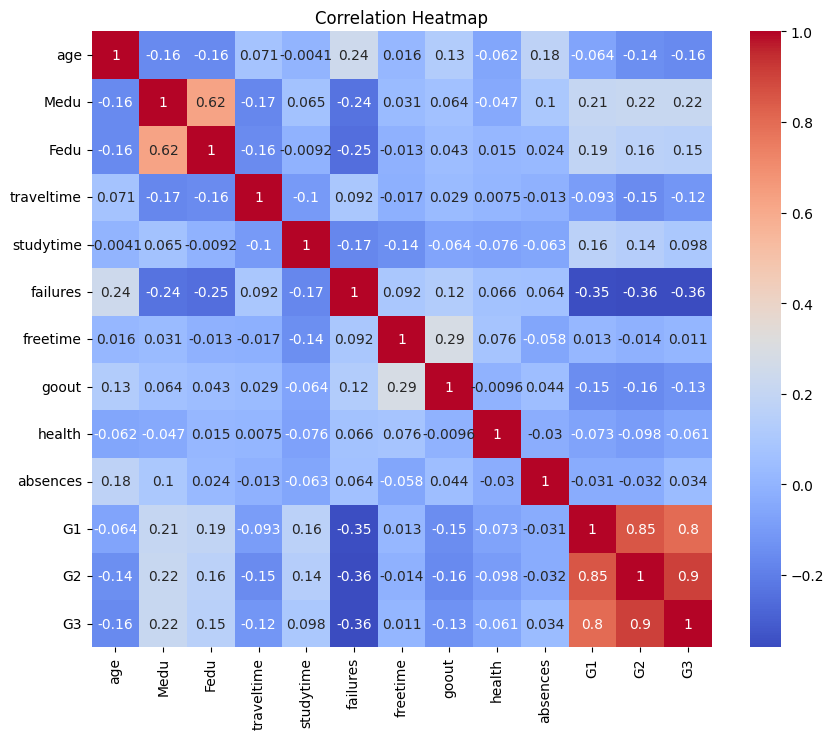

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='age', ylabel='count'>

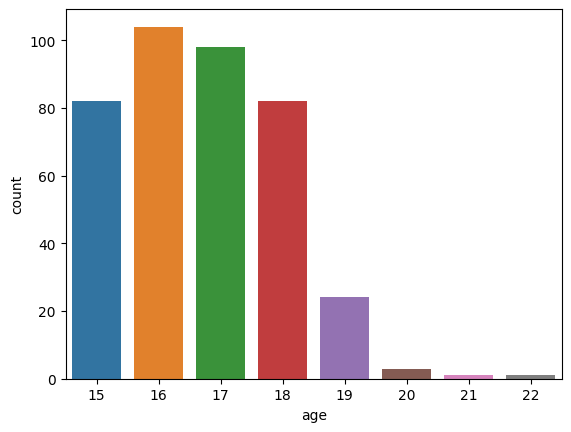

In [ ]:
sns.countplot(x="age",data=df)

In [ ]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

## STEP 3:
### Data Preprocessing
In this step we will perform task as handling missing values and encode catagorical data



### Handling missing values

In [ ]:
df=df.dropna()
print((df.isnull()).sum())

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64


### Encoding catagorical variables

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#for col in df.columns:
#  df[col]=le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# List of column names you want to encode
columns_to_encode = ["internet", "ecactivities", "feespaid", "Gsupport", "Ssupport", "guardian", "Fjob", "Mjob", "Pstatus", "famsize", "address", "sex", "school"]

# Apply LabelEncoder to selected columns using .loc
for column in columns_to_encode:
    df.loc[:, column] = le.fit_transform(df.loc[:, column])



<ipython-input-99-827a75d26753>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, column] = le.fit_transform(df.loc[:, column])
<ipython-input-99-827a75d26753>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df.loc[:, column])
<ipython-input-99-827a75d26753>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["internet"]=le.fit_transform(df["internet"])
df["ecactivities"]=le.fit_transform(df["ecactivities"])
df["feespaid"]=le.fit_transform(df["feespaid"])
df["Gsupport"]=le.fit_transform(df["Gsupport"])
df["Ssupport"]=le.fit_transform(df["Ssupport"])
df["guardian"]=le.fit_transform(df["guardian"])
df["Fjob"]=le.fit_transform(df["Fjob"])
df["Mjob"]=le.fit_transform(df["Mjob"])
df["Pstatus"]=le.fit_transform(df["Pstatus"])
df["famsize"]=le.fit_transform(df["famsize"])
df["address"]=le.fit_transform(df["address"])
df["sex"]=le.fit_transform(df["sex"])
df["school"]=le.fit_transform(df["school"])

<ipython-input-100-f94a1fa6793b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["internet"]=le.fit_transform(df["internet"])
<ipython-input-100-f94a1fa6793b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ecactivities"]=le.fit_transform(df["ecactivities"])
<ipython-input-100-f94a1fa6793b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,0,3,4,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,0,1,3,3,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,1,3,2,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,2,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,3,2,5,4,6,10,10


### Finding Correlation between Attributes

In [ ]:
most_correlated_G2 = df.corr().abs()['G2'].sort_values(ascending=False)
most_correlated_G2 = most_correlated_G2[:9]

most_correlated_G3 = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated_G3 = most_correlated_G3[:9]

# Combine the most correlated features for both G2 and G3
most_correlated = most_correlated_G2.index.union(most_correlated_G3.index)

# Select these features in your DataFrame
df = df.loc[:, most_correlated]


In [ ]:

df.head()

,Fedu,G1,G2,G3,Medu,age,failures,goout,traveltime
0,4,5,6,6,4,18,0,4,2
1,1,5,5,6,1,17,0,3,1
2,1,7,8,10,1,15,3,2,1
3,2,15,14,15,4,15,0,2,1
4,3,6,10,10,3,16,0,2,1


# Data spliting
In this step we will split data in to testing and training data

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
X = df.drop(['G2', 'G3'], axis='columns')
y = df[['G2', 'G3']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
X_train.head()

,Fedu,G1,Medu,age,failures,goout,traveltime
329,4,14,4,17,0,3,2
175,3,10,4,17,0,4,2
161,2,5,3,15,2,4,2
144,1,5,2,17,3,5,1
219,2,9,2,17,0,3,1


# Model Selection and Model Training
Firstly we will select the right algorithm according to our requirement and then we will train data on model

In [ ]:
lr = LinearRegression()
model = MultiOutputRegressor(lr)
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

# Model Evaluation or Testing

In [ ]:
print(model.score(X_test, y_test))                 #Near to 1, good predicts target

0.7182368272632518


In [ ]:
predictions = model.predict(X_test)

In [ ]:
user_input = {}  # Dictionary to store user inputs

for col in X.columns:
    user_input[col] = int(input(f"Enter value for {col}: "))

# Create a DataFrame for user input
user_input_df = pd.DataFrame([user_input])

# Make predictions on user input for G2 and G3
predicted_grades = model.predict(user_input_df)

print("Predicted G2 Grade:", predicted_grades[0, 0])
print("Predicted G3 Grade:", predicted_grades[0, 1])







Enter value for Fedu: 1
Enter value for G1: 1
Enter value for Medu: 1
Enter value for age: 1
Enter value for failures: 1
Enter value for goout: 1
Enter value for traveltime: 1
Predicted G2 Grade: 5.001413331209447
Predicted G3 Grade: 6.045580510601643


In [ ]:
df.head()

,Fedu,G1,G2,G3,Medu,age,failures,goout,traveltime
0,4,5,6,6,4,18,0,4,2
1,1,5,5,6,1,17,0,3,1
2,1,7,8,10,1,15,3,2,1
3,2,15,14,15,4,15,0,2,1
4,3,6,10,10,3,16,0,2,1
